# Final Project: Problem Set 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

import os

C:\Users\MD Shahriar Kabir\AppData\Local\Temp\ipykernel_4536\2231449486.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load Data Folders


In [2]:
train_folder = './Dataset/train/'
val_folder = './Dataset/val/'
test_folder = './Dataset/test/'

Train Data


In [3]:
train_n = train_folder+'/NORMAL/'
train_p = train_folder+'/PNEUMONIA/'

# Plotting

Text(0.5, 1.0, 'Pneumonia')

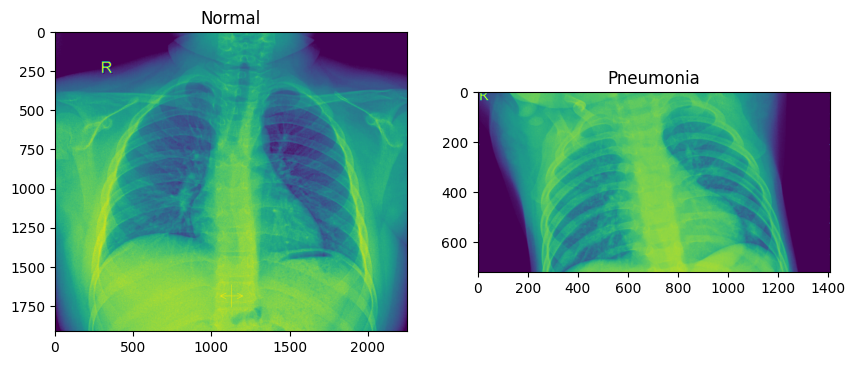

In [4]:
#Normal pic 
rand_norm = np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
norm_pic_address = train_n + norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))
pne_pic =  os.listdir(train_p)[rand_p]
pne_pic_address = train_p + pne_pic

#Ploting images
f = plt.figure(figsize= (10,6))

a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(Image.open(norm_pic_address))
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(Image.open(pne_pic_address))
a2.set_title('Pneumonia')

# Model

In [24]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Conv2D(32, (3, 3), activation="relu"))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(activation = 'relu', units = 128))
cnn_model.add(Dense(activation = 'sigmoid', units = 1))

Compile Model

In [25]:
cnn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [26]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True)

train_set = train_datagen.flow_from_directory(train_folder,
                target_size = (64, 64),
                batch_size = 32,
                class_mode = 'binary')

FileNotFoundError: [WinError 3] The system cannot find the path specified: './Dataset/train/'

In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)

validation_generator = test_datagen.flow_from_directory(val_folder,
                        target_size=(64, 64),
                        batch_size=32,
                        class_mode='binary')

test_set = test_datagen.flow_from_directory(test_folder,
            target_size = (64, 64),
            batch_size = 32,
            class_mode = 'binary')

Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Fit Model

In [17]:
cnn_model_his = cnn_model.fit_generator(train_set,
                steps_per_epoch = 163,
                epochs = 8,
                validation_data = validation_generator,
                validation_steps = 624)

C:\Users\MD Shahriar Kabir\AppData\Local\Temp\ipykernel_4536\2018619375.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model_his = cnn_model.fit_generator(train_set,


Epoch 1/8
163/163 [==============================] - 43s 262ms/step - loss: 0.0709 - accuracy: 0.9716 - val_loss: 0.3472 - val_accuracy: 0.8125
Epoch 2/8
163/163 [==============================] - 41s 250ms/step - loss: 0.0845 - accuracy: 0.9670
Epoch 3/8
163/163 [==============================] - 42s 259ms/step - loss: 0.0751 - accuracy: 0.9716
Epoch 4/8
163/163 [==============================] - 40s 248ms/step - loss: 0.0779 - accuracy: 0.9726
Epoch 5/8
163/163 [==============================] - 40s 245ms/step - loss: 0.0746 - accuracy: 0.9732
Epoch 6/8
163/163 [==============================] - 39s 242ms/step - loss: 0.0734 - accuracy: 0.9747
Epoch 7/8
163/163 [==============================] - 39s 242ms/step - loss: 0.0736 - accuracy: 0.9739
Epoch 8/8
163/163 [==============================] - 40s 244ms/step - loss: 0.0734 - accuracy: 0.9732


# Evaluate Model

Accuracy

In [22]:
test_acc = cnn_model.evaluate_generator(test_set,steps=624)
print('The testing accuracy is :',test_acc[1]*100, '%')

C:\Users\MD Shahriar Kabir\AppData\Local\Temp\ipykernel_4536\4010922054.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_acc = cnn_model.evaluate_generator(test_set,steps=624)


The testing accuracy is : 91.98718070983887 %


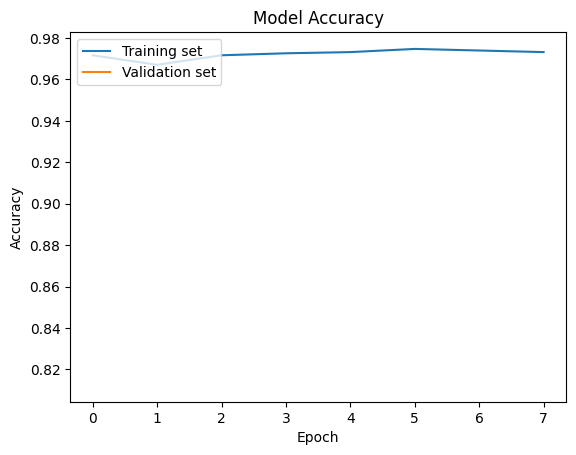

In [23]:
plt.plot(cnn_model_his.history['accuracy'])
plt.plot(cnn_model_his.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

Loss

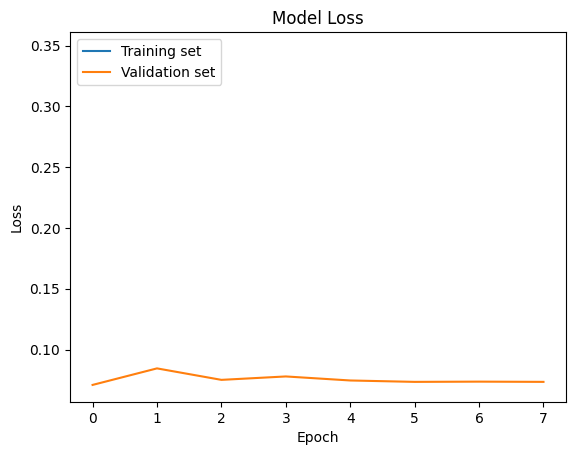

In [21]:
plt.plot(cnn_model_his.history['val_loss'])
plt.plot(cnn_model_his.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()